In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Algebra 3

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = y$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back a new vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

<img src="projection.png" width="80%">

**Note:** $\theta$ in the image above is the same as $c$

Cite: [CS760 Regression Slide](https://pages.cs.wisc.edu/~fredsala/cs760/fall2021/slides/lecture6-regression.pdf)

### Fruit Sales Example

In [2]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [3]:
c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

Dot product both sides by `X.T` ---> this will usually make it solvable.

In [4]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.54861111],
       [0.29861111],
       [1.55555556]])

What is special about dot product of a matrix with its transpose? Resultant shape is always a square.

In [5]:
X.T.shape

(3, 5)

In [6]:
X.shape

(5, 3)

In [7]:
(X.T @ X).shape

(3, 3)

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [8]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [9]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [10]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [11]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [12]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

,x,y
0,2.326849,4.956070
1,3.546678,7.558704
2,1.537110,2.990467
3,5.311118,11.199990
4,3.637853,6.380852
5,3.996218,7.447300
6,6.085866,13.405694
7,6.776088,12.272188
8,3.095508,5.443273
9,1.996240,3.563312


<AxesSubplot:xlabel='x', ylabel='y'>

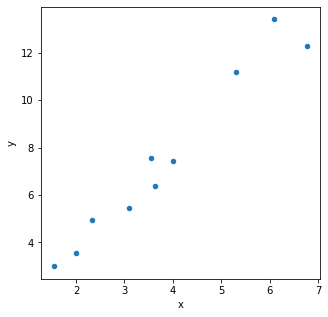

In [13]:
df.plot.scatter(x="x", y="y", figsize=(5, 5))

In [14]:
X = df[["x"]].values
X

array([[2.32684921],
       [3.54667847],
       [1.53710983],
       [5.31111802],
       [3.63785335],
       [3.99621817],
       [6.0858664 ],
       [6.77608771],
       [3.09550835],
       [1.99623964]])

In [15]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.03106486, 0.04735032, 0.02052135, 0.07090667, 0.04856756,
        0.05335195, 0.08125003, 0.09046491, 0.04132693, 0.02665102],
       [0.04735032, 0.07217329, 0.03127949, 0.10807883, 0.07402866,
        0.08132122, 0.12384461, 0.1378903 , 0.06299219, 0.04062257],
       [0.02052135, 0.03127949, 0.01355635, 0.04684074, 0.03208359,
        0.03524414, 0.05367353, 0.05976085, 0.02730045, 0.01760558],
       [0.07090667, 0.10807883, 0.04684074, 0.16184705, 0.11085723,
        0.12177777, 0.18545615, 0.20648944, 0.09433021, 0.06083192],
       [0.04856756, 0.07402866, 0.03208359, 0.11085723, 0.07593172,
        0.08341175, 0.1270283 , 0.14143506, 0.06461153, 0.04166686],
       [0.05335195, 0.08132122, 0.03524414, 0.12177777, 0.08341175,
        0.09162864, 0.13954185, 0.15536783, 0.07097641, 0.04577146],
       [0.08125003, 0.12384461, 0.05367353, 0.18545615, 0.1270283 ,
        0.13954185, 0.21250919, 0.23661066, 0.10809044, 0.06970565],
       [0.09046491, 0.1378903 , 0.0597608

In [16]:
df["p"] = P @ df[["y"]]
df

,x,y,p
0,2.326849,4.956070,4.593955
1,3.546678,7.558704,7.002293
2,1.537110,2.990467,3.034753
3,5.311118,11.199990,10.485868
4,3.637853,6.380852,7.182302
5,3.996218,7.447300,7.889830
6,6.085866,13.405694,12.015473
7,6.776088,12.272188,13.378193
8,3.095508,5.443273,6.111537
9,1.996240,3.563312,3.941224


<AxesSubplot:xlabel='x', ylabel='p'>

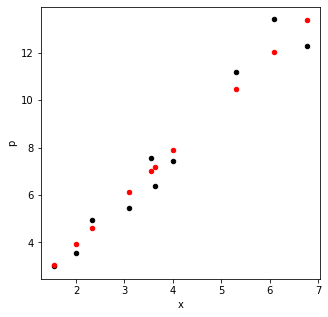

In [17]:
ax = df.plot.scatter(x="x", y="y", figsize=(5, 5), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [18]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [19]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [20]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

2.3529056871330427

### Lab review

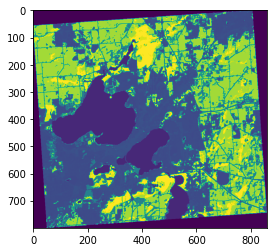

In [21]:
# As an exception, I am providing all the relevant import statements in this cell
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip://land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])

# Classification 1

In [22]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [23]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


### Model 1: Predict petal width

- regression problem

In [24]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "petal width (cm)"

# 1. initialize model
reg_model = LinearRegression(fit_intercept=False)
# 2. fit using train data
reg_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["pet_width_predictions"] = reg_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,pet_width_predictions
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


### LogisticRegression

- classification model
- predict categorical labels

### Model 2: Predict whether flower is "setosa"

- classification problem, specifically binary classification: True / False

In [25]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,pet_width_predictions,setosa_predictions
82,5.8,2.7,1,1.2,False,versicolor,1.327769,False
134,6.1,2.6,1,1.4,False,virginica,1.590835,False
114,5.8,2.8,1,2.4,False,virginica,1.279061,False
42,4.4,3.2,1,0.2,True,setosa,0.083889,True
109,7.2,3.6,1,2.5,False,virginica,1.889735,False
57,4.9,2.4,1,1.0,False,versicolor,0.830818,False
1,4.9,3.0,1,0.2,True,setosa,0.538569,True
70,5.9,3.2,1,1.8,False,versicolor,1.155681,False
25,5.0,3.0,1,0.2,True,setosa,0.610022,True
84,5.4,3.0,1,1.5,False,versicolor,0.895833,False


What is the accuracy? That is what percent of the time is it correct?

Review of `score` method.

In [26]:
cls_model.score(test[xcols], test[ycol])

1.0

### Model 2b: Predict probablity of flower being "setosa"

- classification problem, probablity between 0 to 1

#### `<model object>.predict_proba(X)`

- Calibrated probabilities of classification.
- returns a numpy array of probabilities (that it is True):
    - [[False probablity, True probablity], ...]
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba

In [27]:
cls_model.predict_proba(test[xcols])  

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

Extract just the True probablities.

In [28]:
cls_model.predict_proba(test[xcols])[:, 1]

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [29]:
test["setosa_prob"] = cls_model.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,pet_width_predictions,setosa_predictions,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,1.327769,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,1.590835,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,1.279061,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,0.083889,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,1.889735,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,0.830818,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,0.538569,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,1.155681,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,0.610022,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,0.895833,False,0.349072


### Model 4: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [30]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,pet_width_predictions,setosa_predictions,setosa_prob,variety_predictions
82,5.8,2.7,1,1.2,False,versicolor,1.327769,False,0.059437,versicolor
134,6.1,2.6,1,1.4,False,virginica,1.590835,False,0.020275,virginica
114,5.8,2.8,1,2.4,False,virginica,1.279061,False,0.085368,versicolor
42,4.4,3.2,1,0.2,True,setosa,0.083889,True,0.929430,setosa
109,7.2,3.6,1,2.5,False,virginica,1.889735,False,0.066543,virginica
57,4.9,2.4,1,1.0,False,versicolor,0.830818,False,0.147721,versicolor
1,4.9,3.0,1,0.2,True,setosa,0.538569,True,0.642773,setosa
70,5.9,3.2,1,1.8,False,versicolor,1.155681,False,0.258524,versicolor
25,5.0,3.0,1,0.2,True,setosa,0.610022,True,0.585481,setosa
84,5.4,3.0,1,1.5,False,versicolor,0.895833,False,0.349072,versicolor


What is the accuracy?

In [31]:
mult_model.score(test[xcols], test[ycol])

0.9